# A2 - Part B and Part C answer sheet



In [1]:

# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

# set the random number generator
np.random.seed(7)

# import pandas
import pandas as pd
import numpy as np


# Part B:*Express Checkout* (50 marks)


## B1: One queue, one station [15 marks]

We'll start by simulating ACME QuickMart's current checkout setup: one queue with one checkout station.

• Assume that a customer is equally likely to arrive during any timestep. We'll denote this
probability using the Greek letter lambda, 𝜆, or the variable name lam.

• Based on data provided, we know that, on average, it takes 5 minutes for a customer to
check out. Though checkout times are highly variable. A simple way to model this variability is to assume that when a customer is checking out, they have the same probability of finishing up during each time step. We'll denote this probability using the
Greek letter mu, 𝜇, or the variable name mu.

• Functions B1 bellow is to complete the One queue, One station.

• Generate and plot data for the One queue, One station scenario

### B1.1 Complete functions - one queue, one station

In [2]:
def make_system(kwargs):
    """
    function make_system is used to create System Object 
    and returns System object
    kwargs: used to pass a keyworded,variable-length argument dictionary to the function
    
    """
    
    system = System(kwargs)

    return system


def update_func_1q1s(x, t, system):
    """
    Create function for one queue, one station
    x: total customers in the store, including customers checking-out
    t: minutes that have elapsed in the simulation
    system: System object

    return total number of customers at the end of the time step
    """
    #if there is a customer checking out
    if x>0:
        if flip(system.mu):
            x -= 1
    # Arrival of new customer
    if flip(system.lam):
            x += 1
    return x

def run_simulation(system, update_func):
    """
    Simulate a queueing system for a number of step
    system: System object
    update_func: the update function to calculate number of customer in the store at the end of each time step
    return Timeseries which show total customers in store, including checking-out pp
    """
    # Create Timeseries with the total number of customers in store
    results = TimeSeries()
    x = 0
    results[0] = 0
    
    # for each timestep over the duration specified in the System Object
    for t in range(int(system.duration)):
        x = update_func(x, t, system)
        results[t+1] = x

    return results

def param_sweep(low_range, high_range, param, num_vals):
    """
    This function is to generates and returns an array which has a range of values for a parameter by
    sweeping through a range of possible values, from low to high
    
    low_range: low range of possible values
    high_range: high range of possible values
    param: parameyer to sweep
    num_vals: number of values btw low to high to generate

    """
    
    param_array = linspace(low_range*param, high_range*param, num_vals)

    return(param_array)

def compute_metrics(results, system):
    """
    Compute average number of customers and wait time.
    results: Timeseries of queue lengths
    system: System Object

    return: L: the average number of customers in the system
    and W: average time customers spend in the store.
    """
    L = results.mean()
    W = L/system.lam

    return L, W

def sweep_lam(lam_array, system, update_func):
    """
    Run simulations for a range of values for lam.
    lam_array: array of values for 'lam' to sweep
    system: System object
    update_func: passed along to run_simulation

    return: SweepSeries of average wait time vs lam
    """
    sweep = SweepSeries()

    #for each value of lam, it runs a simulation, computes L and W, and store the value of W in a SweepSeries
    for lam in lam_array:
        system.lam = lam
        results = run_simulation(system, update_func)
        L,W = compute_metrics(results, system)
        sweep[lam] = W
        
    return sweep

### B1.2: Generate data & Plot scenario

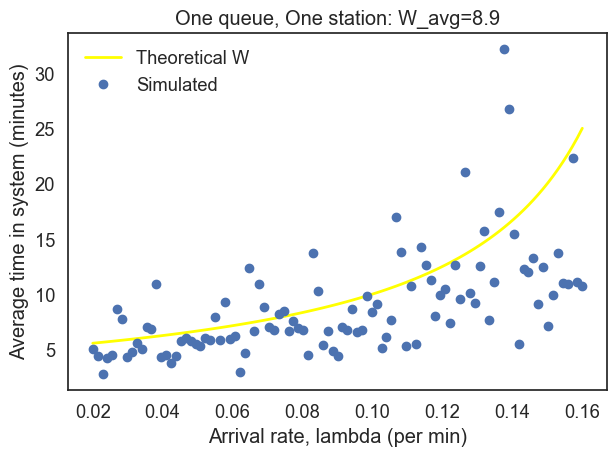

In [3]:
# Step 1: Define kwargs - keywords arguments for One queue, One station checkout system
# set lam (arrival rate) = 1/8, 
# set mu (average checkout time of 5 minutes) = 1/5
# set duration to 10hours, expressed in minutes
kwargs_1q1s = {'lam':1/8, 'mu':1/5, 'duration':600}    
system = make_system(kwargs_1q1s)

#Step 2: Generate an array of 101 lambda values from 10% to 80% of the completion rate
lam_array = param_sweep(0.1, 0.8, system.mu, 101)

#Step 3: Generate s SweepSeries of the average time in system
sweepResults = sweep_lam(lam_array, system, update_func_1q1s)

#Step 4: Calculate and plot the theoretical average W
W_avg = sweepResults.mean()

plot(lam_array, 1/(system.mu - lam_array), color = 'yellow', label = "Theoretical W")
plot(sweepResults, 'bo', label = "Simulated")
decorate(title = "One queue, One station: W_avg="  + str(round(W_avg,2)),
         xlabel = "Arrival rate, lambda (per min)",
         ylabel = "Average time in system (minutes)")

## B2: One queue, Two stations  [10 marks]

### B2.1 Complete function - one queue, two stations

In [4]:
# Your solution here.
def update_func_1q2s(x, t, system):
    """
    Simulate 1 queue, 2 stations.
    In this function, only the second station opened if 3 or more customer are waiting in the queue
    
    x: total customers in the store, including customers checking-out
    t: minutes that have elapsed in the simulation
    system: System object

    return total number of customers at the end of the time step
    """
    #Handles checkout when one station is open
    if(3>x and  x>0):
        if(flip(system.mu)):
            x = x-1

    #Handles checkout when two stations are open
    if(x>=3):
        if(flip(system.mu)):
            x = x-1
        if(flip(system.mu)):
            x = x-1   
    if(flip(system.lam)):
        x = x+1
    
    return x


### B2.2 Generate data & Plot scenario

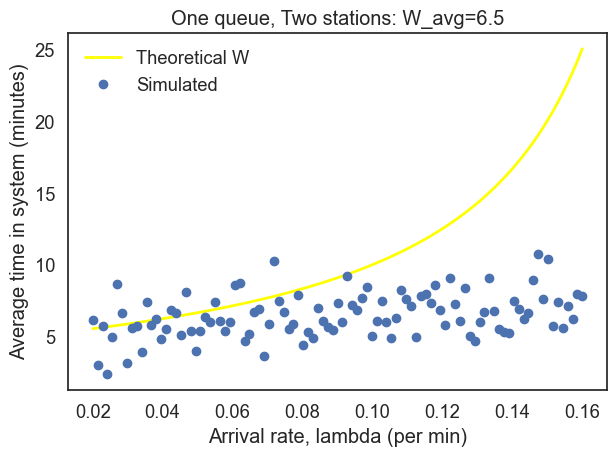

In [5]:
# Step 1: Define kwargs - keywords arguments for One queue, Two station checkout system
## set lam (arrival rate) = 1/8, 
# set mu (average checkout time of 5 minutes) = 1/5
# set duration to 10hours, expressed in minutes
kwargs_1q2s = {'lam': 1/8, 'mu':1/5, 'duration': 600}
system = make_system(kwargs_1q2s)

#Step 2: Generate an array of 101 lambda values from 10% to 80% of the completion rate
lam_array = param_sweep(0.1, 0.8, system.mu, 101)

#Step 3: Generate s SweepSeries of the average time in system
sweepResults = sweep_lam(lam_array, system, update_func_1q2s)

#Step 4: Calculate and plot the theoretical average W
W_avg = sweepResults.mean()

plot(lam_array, 1/(system.mu - lam_array), color = 'yellow', label = "Theoretical W")
plot(sweepResults, 'bo', label = "Simulated")

decorate(title = "One queue, Two stations: W_avg="  + str(round(W_avg,2)), 

         xlabel = "Arrival rate, lambda (per min)",

         ylabel = "Average time in system (minutes)")

## B3: Express checkout:  [20 marks]

### B3.1: Complete functions - express checkout

In [6]:
def make_system_express(kwargs_express):

    """
    Make a system for express checkout
    where the second station is an express station for customers with 10 or less items,
    If no customers are in the express queue, 
    the express checkout server will take the next customer from the full service queue

    kwargs: used to pass a keyworded,variable-length argument dictionary to the function
    
    """

    system = System(kgs)
    return system
 

def update_func_express(x_full, x_express, t, system):
    """
    Update function express used forthe express checkout system.
    If there's a customer checking out, use flip to decide if they are done.
    When a customer arrives, we use flip with the express probability
    to determine if they should enter the express queue
    If the arriving customer has more
    than 10 items but the express queue is empty, they should be assigned to the expressqueue. 
    Otherwise they enter the full service queue. 
    
    x_full: number of customers in the full service queue
    x_express: number of customers in the express queue
    t: time step
    system: System object 

    returns: total number of customers at the end of time step
    """

    #This block of code models people finishing their checkout process
    #Process customer in the full service queue
    if(x_full > 0):
        if(flip(system.mu)):
            x_full = x_full - 1
    #Process customer in the express queue
    if(x_express >0):
        if(flip(system.mu)):
            x_express = x_express -1

    #This block of code models arrivals to the respective queues
    #Check for a new customer arrival
    if(flip(system.lam)):
        if(flip(system.express)): # Check if customers move to the express queue 
            x_express = x_express + 1
        else:
            if(x_full > 0 and x_express==0):

                x_express = x_express + 1
            else:
                x_full = x_full + 1

    return x_full, x_express


In [7]:
def run_simulation_express(system, update_func):
    """
    Simulate an express checkout system for a number of steps.

    system: System object with attributes `duration`
    update_func: function object to update the state of the system to calculate number of customer in store at the end of the time step

    returns: TimeSeries with the number of customers in the full and express queues
    """
    # create Timeseries with total number of customers in store
    results = TimeSeries()
    x_full = 0
    x_express = 0
    results[0] = 0

    # for each timestep over the duration specified in the System Object
    for t in range(int(system.duration)):
        x_full, x_express = update_func(x_full, x_express, t, system)
        results[t+1] = x_full + x_express 

    return(results)  

def sweep_lam_express(lam_array, system, update_func, run_simulation_func):
    """
    Run simulations with a range of lambda values for the express checkout system,
    compute L and W, and store the value of W in a SweepSeries.

    lam_array: array of values for lambda
    system: System object
    update_func: function object to update the state of the system
    run_simulation_func: function object to run the simulation

    returns: SweepSeries of average wait time vs lambda
    """
   
    sweep = SweepSeries()

    #for each value of lam, it runs a simulation, computes L and W, 
    # and store the value of W in a SweepSeries
    for lam in lam_array:
        system.lam = lam
        results = run_simulation_func(system, update_func)
        L,W = compute_metrics(results, system)
        sweep[lam] = W

    return sweep

### B3.2: Express checkout: Generate & Plot data

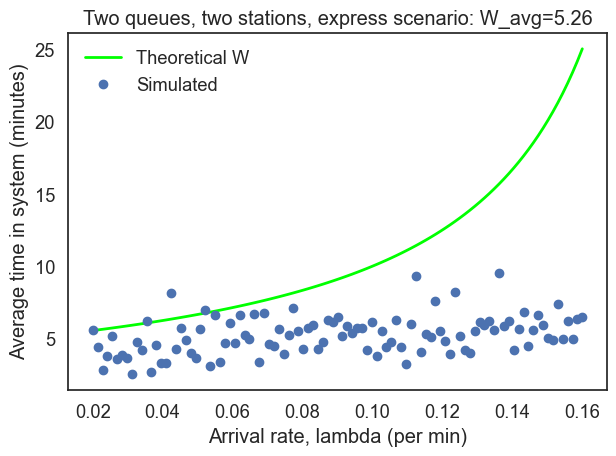

In [8]:
# Step 1: Define kwargs - keywords arguments for One queue, Two station checkout system
## set lam (arrival rate) = 1/8, 
# set mu (average checkout time of 5 minutes) = 1/5
# set duration to 10hours, expressed in minutes
# set express (probablitity of <=10 items) = 1/4
kwargs_express = {'lam':1/8, 'mu':1/5, 'duration':600, 'express':1/4}    
system = make_system(kwargs_express)

#Step 2: Generate an array of 101 lambda values from 10% to 80% of the completion rate
lam_array = param_sweep(0.1, 0.8, system.mu, 101)

#Step 3: Generate SweepSeries of average time in System
sweepResults = sweep_lam_express(lam_array, system, update_func_express, run_simulation_express)

#Step 4: Calculate and plot the theoretical average W

W_avg = sweepResults.mean()

plot(lam_array, 1/(system.mu - lam_array), color = 'lime', label = "Theoretical W")
plot(sweepResults, 'bo', label = "Simulated")
decorate(title="Two queues, two stations, express scenario: W_avg="+str(round(W_avg,2)), 
         xlabel="Arrival rate, lambda (per min)",
         ylabel="Average time in system (minutes)")

## B4 Recommend a checkout configuration [5 Marks]
Which checkout configuration should ACME QuickMart adopt? Justify your choice with data from your simulations.  Include data on the`W_avg`for each scenario in your comparison of the checkout configurations.

Looking at the simulations above, ACME QuickMart should adop the Express Checkout. This configurations generate a fast customer service. Because if there are high levels of customer arrivals, the express line can effectively deal with customer check-out in shorter times. As can see W_avg = 5.26 which reduce the average waiting time, compared to the One Queue-One Station, One Queue-Two Station with higher W_avg = 8.9 and 6.5 respectively. 

Although, One Queue-Two Station configuration is showing that it is reducing W_avg by 2.4, this configuration might only perform well when there are less amounts of customer arrivals, and might be a struggle during higher level of customer visits. 

Therefore, with higher customer arrival rates, the Express Checkout will be the best solution, which customers do not need to wait long for checking-out.

# Part C:*Australian Population Modelling * (40 marks)



## C1 Proportional growth model [15 marks]

In [9]:

data = pd.read_csv('Australian_Population.csv')
data1 = data.set_index('Year') # set  Year column as Index

# Scale Australia Population values into smaller numbers
aus = data1['Australian Population']  / 1e7

aus.tail()

Year
2012    2.273347
2013    2.312813
2014    2.347569
2015    2.381600
2016    2.419091
Name: Australian Population, dtype: float64

In [10]:
print(aus.index[0])
print(aus.iloc[0])

1901
0.3788123


In [11]:

def plot_results(aus, timeseries, title):
    """
    Plotting to compare Australian population and Proportional Model
    aus: Australian population
    timeseries: Proportional Model changes over years
    title: title of the diagram
    """
    plt.plot(aus, ':', label='Australian Population')
    plt.plot(timeseries, color='purple', label='model')
    decorate(xlabel='Year',
             ylabel='Australian Population (million)',
             title=title)

def run_simulation(system, update_func):
    """
    this function is used to run the Proportional Model
    It takes the second parameter is a 'update_func' function 
    Each time through the loop, run_simulation calls update_func to compute net growth
    """
    # Using TimeSeries Object to store the results which show changing of net growth each year
    results = TimeSeries()
    #Set the first value in the Timeseries
    results[system.t_0] = system.p_0
    
    # Inside the loop, the value t goes from the 1st year to the end year, but not the last
    # Computing the population for the next year by updating func 
    # where adding the pop for the current year and net growth
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
    
    return results
# Call get_first_label(aus), get_last_label(aus), and get_first_value(aus)
t_0 = get_first_label(aus)
t_end = get_last_label(aus)

p_0 = get_first_value(aus)


0.3788123

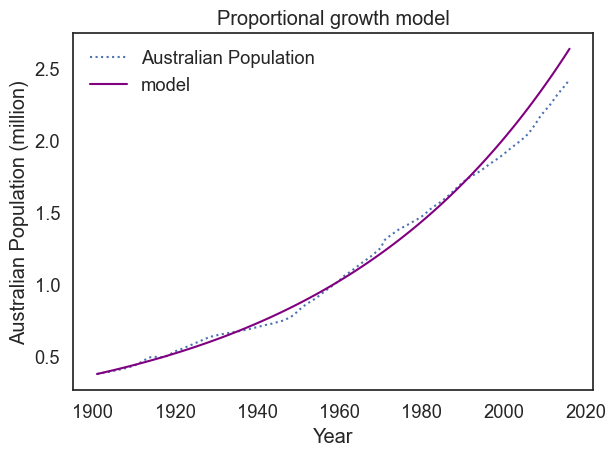

In [12]:

def update_prop(pop, t, system):
    """
      Update the population using the proportional growth model
      with net growth = system.alpha * pop
      pop: The current population.
      t: The current time step.
      system: System Object.
      Returns:
        The updated Proportional Growth population Model.
    """
    #present the net growth as the following fomular
    #with alpha is the conventional name for a proportional growth rate
    net_growth = system.alpha * pop
  
    return net_growth + pop

# System object contains four new variables
# with alpha is approximate value that can change to best fit for the Proportional Model
# Assign good number for alpha
alpha = 0.017
system = System(t_0 = t_0,
                t_end = t_end,
                p_0 = p_0,
                alpha=alpha) 

#inside run_simulation, call update_prop function to compute net growth
results = run_simulation(system, update_prop)
#Plot the Prop model
plot_results(aus, results, 'Proportional growth model')

## C2  Quadratic growth model [10 marks]

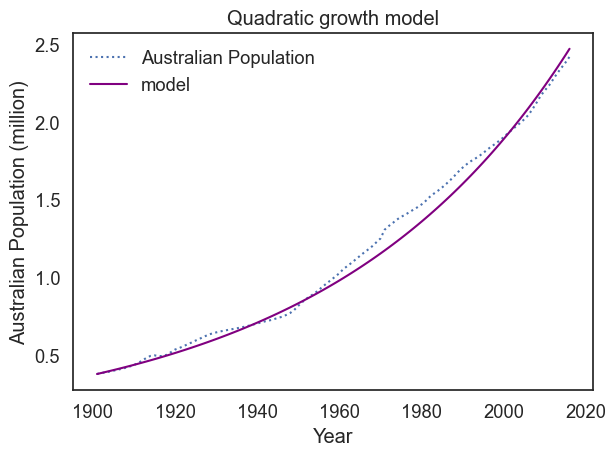

In [13]:
def update_quad(pop, t, system):
    """
    Creat Quadratic Growth model 
    with updated new net growth = system.beta * pop + system.gamma * pop**2
    pop: The current population.
    t: The current time step.
    system: System Object
    """
    
    net_growth = system.beta * pop + system.gamma * pop**2
    return pop + net_growth

# System Object add new parameters beta and gamma
# The beta and gamma values are approximate values that can change to best fit for the Quadratic Model
# Assign number for beta and gamma
beta = 0.016
gamma = 0.0004
system = System(t_0 = t_0,
                t_end = t_end,
                p_0 = p_0,
                beta=beta,
                gamma=gamma)

#run the Quad model, inside the run_simulation function, call update_prop function to compute net growth
results = run_simulation(system, update_quad)
#Plot the Quad model
plot_results(aus, results, 'Quadratic growth model')

## C3  Linear growth model [10 marks]

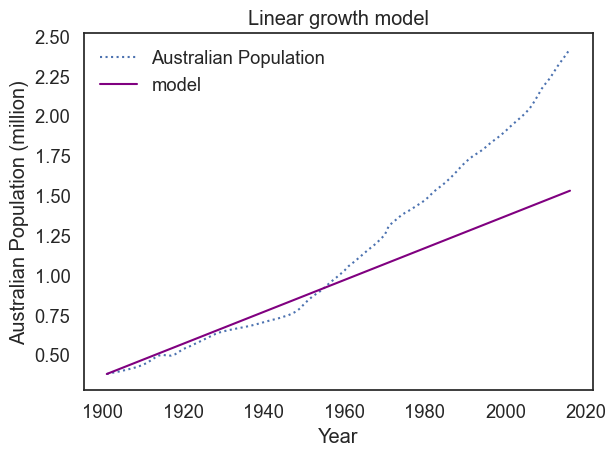

In [14]:
def update_lin(pop, t, system):
    """
    Creat Linear Growth model 
    with updated new net growth = system.theta
    pop: The current population.
    t: The current time step.
    system: System Object
    """
    net_growth = system.theta
    return pop + net_growth

# System Object add new parameters theta
# The theta is approximate value that can change to best fit for the Linear Model
#Assign a number for theta
theta = 0.010
system = System(t_0 = t_0,
                t_end = t_end,
                p_0 = p_0,
                theta = theta) 
#run the model, inside the run_simulation function, call update_prop function to compute net growth
results = run_simulation(system, update_lin)
#Plot the Linear Model
plot_results(aus, results, 'Linear growth model')

## C4 Comparing projections [5 marks]

In [15]:
# Add four new parameters for System Object,
# alpha, beta, gamma, theta are values from three models above
system = System(t_0 = t_0,
                t_end = t_end,
                p_0 = p_0,
                alpha = alpha,
                beta=beta,
                gamma=gamma,
                theta = theta)

,values
t_0,1901.000000
t_end,2016.000000
p_0,0.378812
alpha,0.017000
beta,0.016000
gamma,0.000400
theta,0.010000


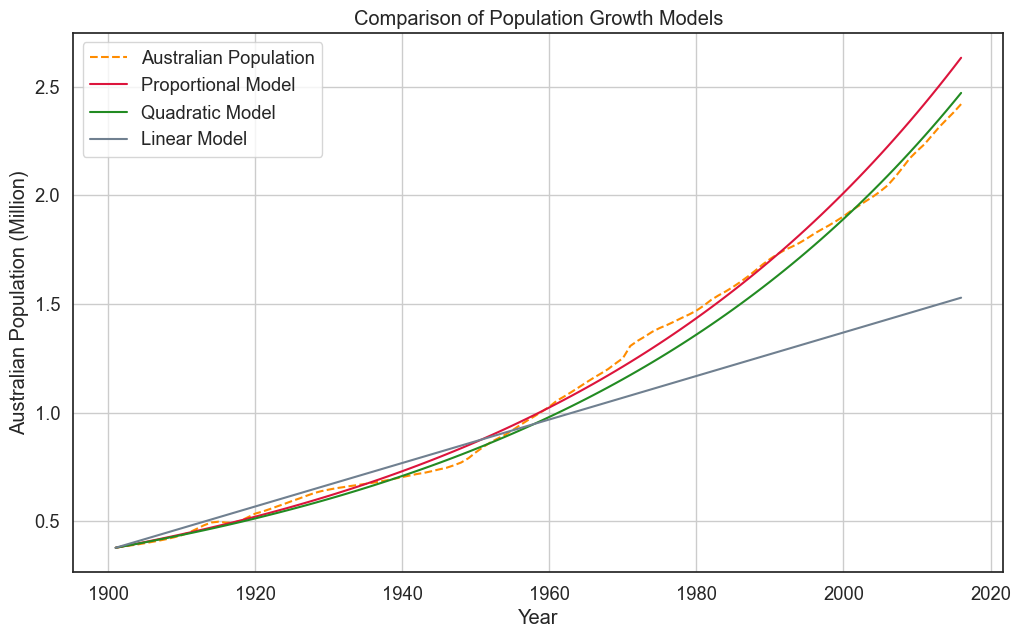

In [16]:
#Call run_simulation function from the 3 models to plot the model results
prop = run_simulation(system, update_prop)
quad = run_simulation(system, update_quad)
lin = run_simulation(system, update_lin)

plt.figure(figsize=(12, 7))

#Plotting to compare the 3 models vs the current growth population
plt.plot(aus, '--', color='darkorange', label='Australian Population')
plt.plot(prop, color='crimson', label='Proportional Model')
plt.plot(quad, color='forestgreen', label='Quadratic Model')
plt.plot(lin, color='slategrey', label='Linear Model')

plt.xlabel('Year')
plt.ylabel('Australian Population (Million)')
plt.title('Comparison of Population Growth Models')
plt.legend()
plt.grid(True)
plt.show()


## Analysing three population growth models

#### Proportional Growth Model:
- with alpha=0.017
- The proportional model is preseted by red line, showing reasonably fit to the actual population from 1900 to 1992.
- However, after 1992, the model overestimates population growth.
- Therefore, This model provides a good approximation for short-term prediction, but could not predict well for the long-term future years.

#### Quadratic Growth Model:
- with beta=0.016, and gamma=0.0004
- The quadratic model is observed as underestimation during the period from approximately 1958 to 2000.
- Interestingly, The model is showing a closer fit for the entire period from 2000 to 2016
- Due to its flexibility in modeling and accelerating growth, the Quadratic Growth Model provides more accurate fit future projections.
- The quadratic model captures the accelerating growth rate seen in the actual population data better than the proportional model.

#### Linear Growth Model:
- with theta = 0.01
- The linear model is underestimating the population growth for the whole period from around 1955.
- It is clearly observed that the linear model is not suitable for modeling the Australian porpolation trend.

## Summary of the most fitted models

- When compared to the Linear Model, the Proportional and Quadratic Growth Models both offer a greater fit to the historical population data. While the Quadratic Model more accurately represents the growing increase in the later decades, the Proportional Model fits well during the early decades.

- The Proportional Growth Model reflects the early steady growth rate, which is frequently achievable for many populations in their early stages of development.
- The Quadratic Growth Model is essential for future longer-term prediction because it can represent the growth rate observed in the second part of the 20th century.

- Combining the two models produces a more thorough knowledge of population trends. For short-term estimates, the proportional model can be applied, and for longer-term projections where growth rates are predicted to fluctuate, the quadratic model can be applied.

Adapted from: Case Study Queueing theory and textbook.
Copyright 2017 Allen Downey
License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)
